Following: https://www.dataquest.io/blog/tutorial-time-series-analysis-pandas/
        
with brazilian loteria federal data

In [2]:
import pandas as pd

# The dataset

In [16]:
df = pd.read_csv('../data/D_LOTFED.HTM.csv', parse_dates=['Data Sorteio'], index_col=['Data Sorteio'])

df.shape

(5355, 6)

In [17]:
df.head(3)

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio
Data Sorteio,,,,,,
1962-09-15,1,5349,38031,26492,25151,1416
1962-09-22,2,3334,34714,20967,36468,18452
1962-09-29,3,27793,15637,11505,14184,25711


In [18]:
df.tail(3)

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio
Data Sorteio,,,,,,
2019-01-19,5355,48201,15953,14408,71491,46099
2019-01-23,5356,60016,48435,73723,29348,66859
2019-01-26,5357,54015,45791,7696,12970,46950


In [19]:
df.dtypes

Concurso     int64
1º Prêmio    int64
2º Prêmio    int64
3º Prêmio    int64
4º Prêmio    int64
5º Prêmio    int64
dtype: object

In [20]:
df.index

DatetimeIndex(['1962-09-15', '1962-09-22', '1962-09-29', '1962-03-10',
               '1962-06-10', '1962-10-10', '1962-10-13', '1962-10-17',
               '1962-10-20', '1962-10-24',
               ...
               '2018-12-26', '2018-12-29', '2019-02-01', '2019-05-01',
               '2019-09-01', '2019-12-01', '2019-01-16', '2019-01-19',
               '2019-01-23', '2019-01-26'],
              dtype='datetime64[ns]', name='Data Sorteio', length=5355, freq=None)

In [ ]:
df.index.

In [82]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday_name
df['decade'] = df['year'] // 10

df.sample(5, random_state=0)

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio,year,month,weekday,decade
Data Sorteio,,,,,,,,,,
1967-08-04,452,20161,11943,31720,21512,18162,1967,8,Friday,196
2014-10-29,4914,9289,13177,23872,10125,93552,2014,10,Wednesday,201
2008-09-13,4277,34050,14207,29052,52212,43939,2008,9,Saturday,200
1980-10-22,1739,69048,41743,39125,36945,18624,1980,10,Wednesday,198
1998-09-23,3304,17928,19654,26943,52572,28735,1998,9,Wednesday,199


In [23]:
df.loc['2008-09-13']

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio,year,month,weekday
Data Sorteio,,,,,,,,,
2008-09-13,4277,34050,14207,29052,52212,43939,2008,9,Saturday


In [25]:
df.loc['2019-01-01':'2019-01-30']

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio,year,month,weekday
Data Sorteio,,,,,,,,,
2019-01-16,5354,13020,71362,11934,65056,17644,2019,1,Wednesday
2019-01-19,5355,48201,15953,14408,71491,46099,2019,1,Saturday
2019-01-23,5356,60016,48435,73723,29348,66859,2019,1,Wednesday
2019-01-26,5357,54015,45791,7696,12970,46950,2019,1,Saturday


In [26]:
df.loc['2019-01']

,Concurso,1º Prêmio,2º Prêmio,3º Prêmio,4º Prêmio,5º Prêmio,year,month,weekday
Data Sorteio,,,,,,,,,
2019-01-16,5354,13020,71362,11934,65056,17644,2019,1,Wednesday
2019-01-19,5355,48201,15953,14408,71491,46099,2019,1,Saturday
2019-01-23,5356,60016,48435,73723,29348,66859,2019,1,Wednesday
2019-01-26,5357,54015,45791,7696,12970,46950,2019,1,Saturday


# Visualizing time series data

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set(rc={'figure.figsize':(20, 6)})

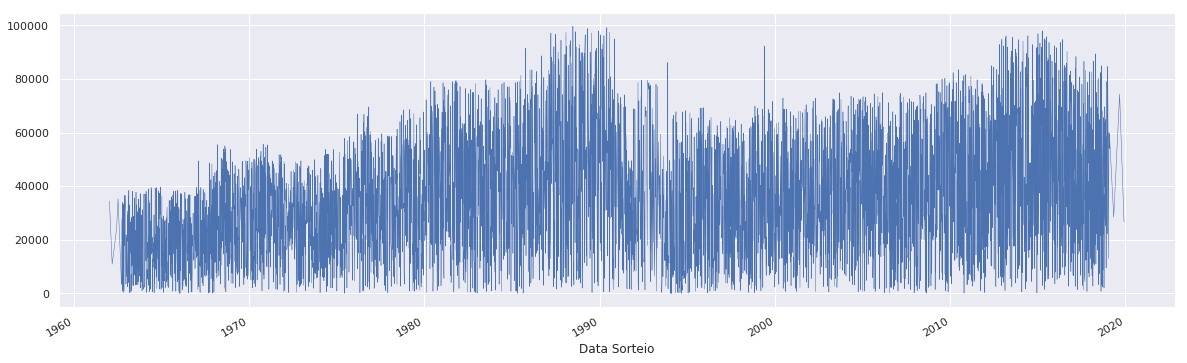

In [33]:
df['1º Prêmio'].plot(linewidth=0.5)

# WTF?

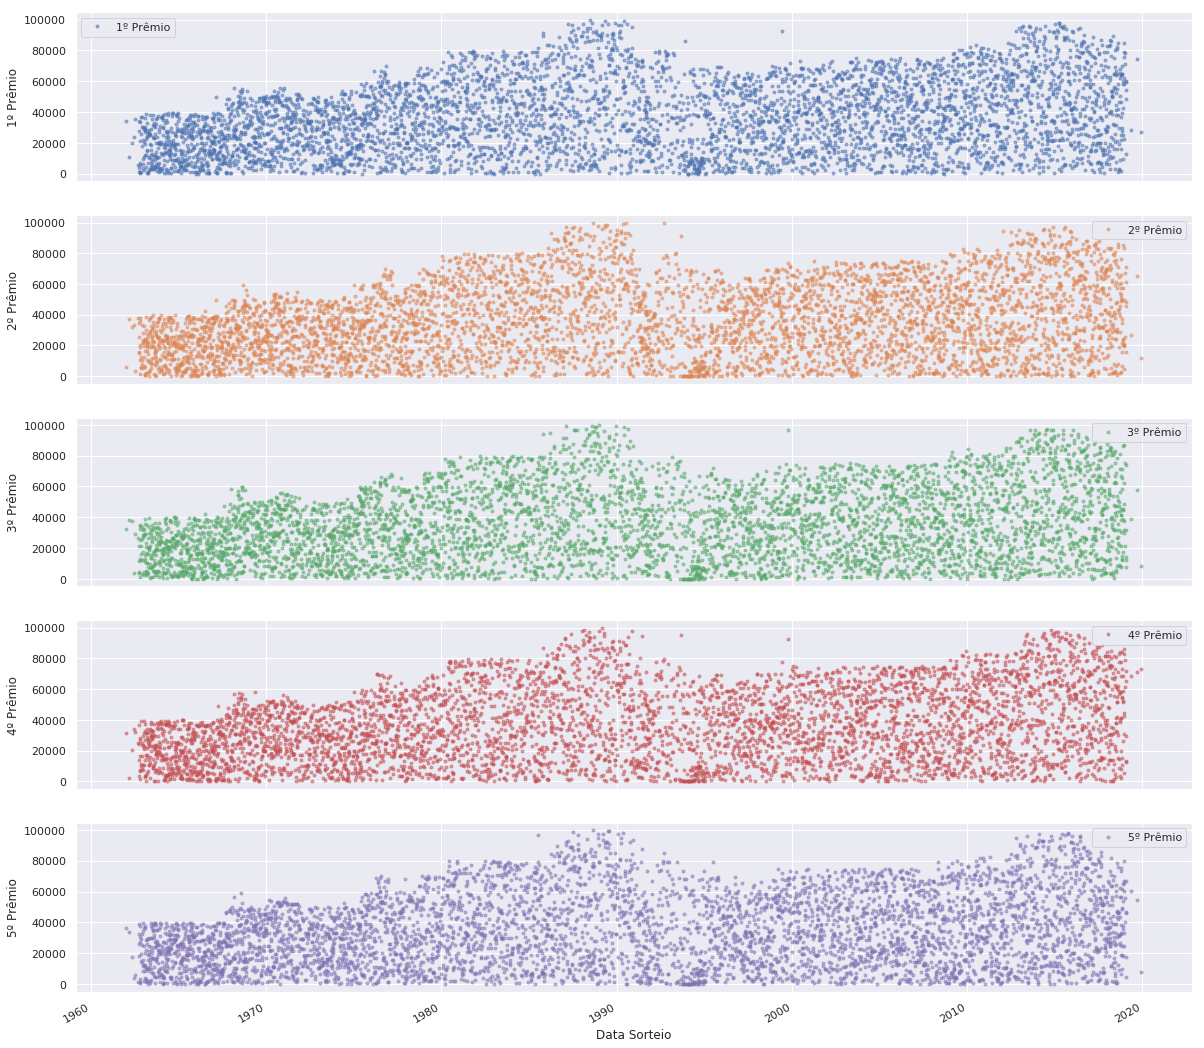

In [49]:
cols_plot = ['1º Prêmio', '2º Prêmio', '3º Prêmio', '4º Prêmio', '5º Prêmio']

axes = zip(cols_plot, df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 20), subplots=True))

for col, ax in axes:
    ax.set_ylabel(col)

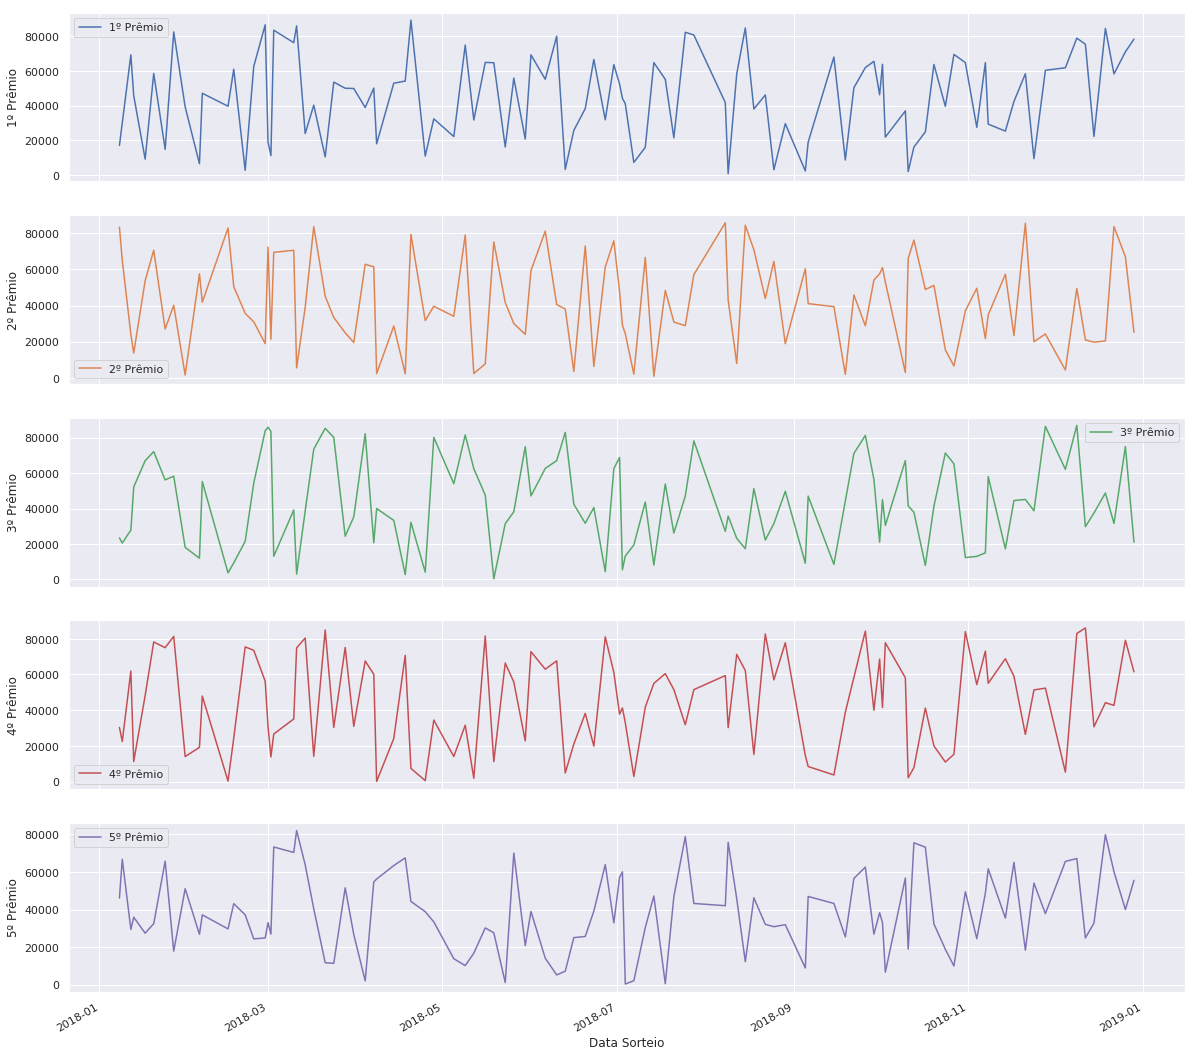

In [50]:
axes = zip(cols_plot, df.loc['2018', cols_plot].plot(figsize=(20, 20), subplots=True))

for col, ax in axes:
    ax.set_ylabel(col)

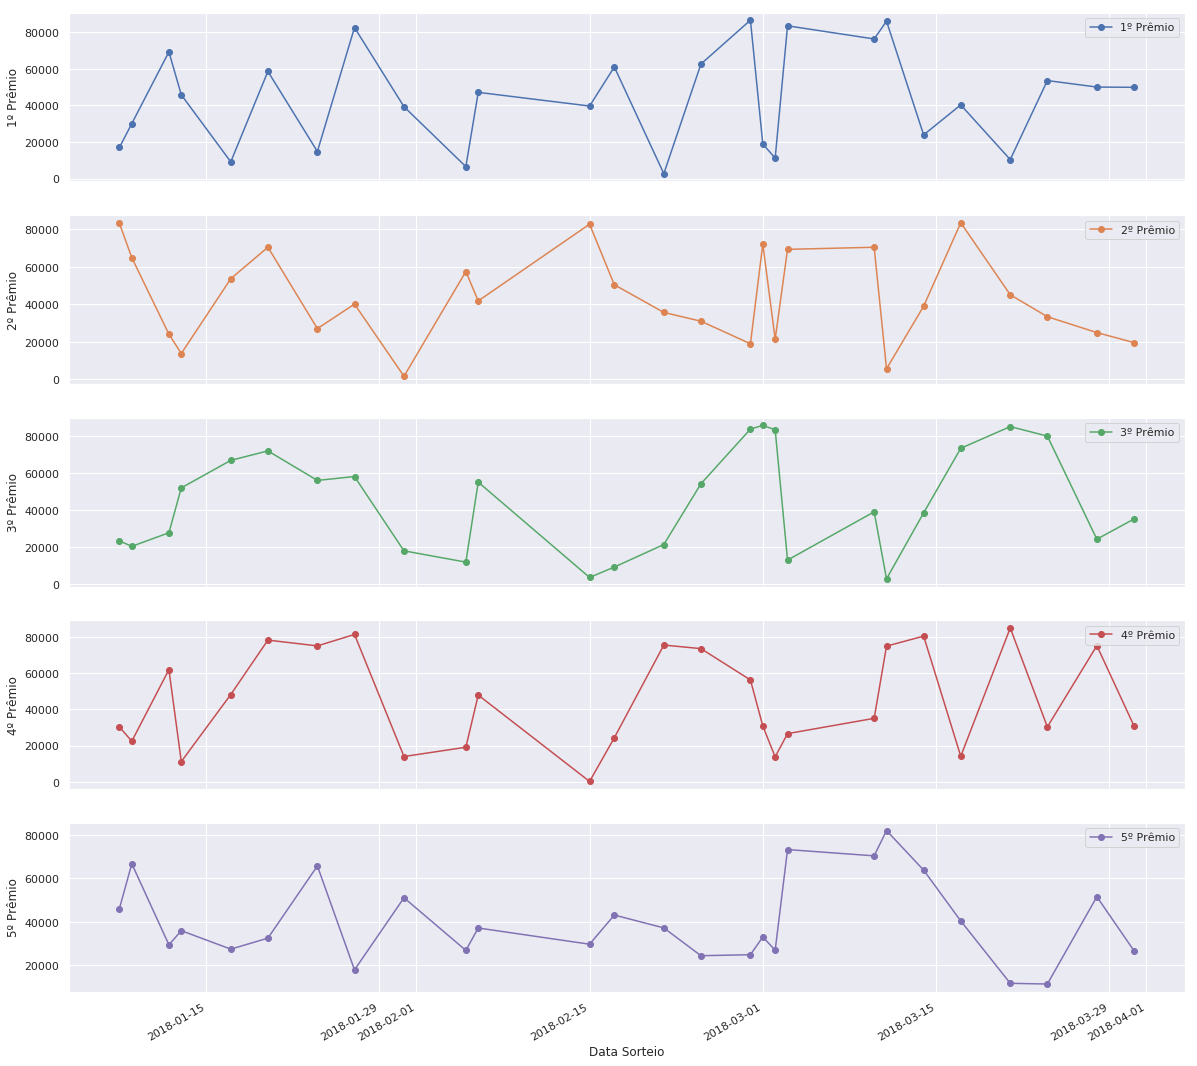

In [67]:
axes = zip(cols_plot, df.loc['2018-01':'2018-03', cols_plot].plot(marker='o', linestyle='-', figsize=(20, 20), subplots=True))

for col, ax in axes:
    ax.set_ylabel(col)

# Customizing time series plots

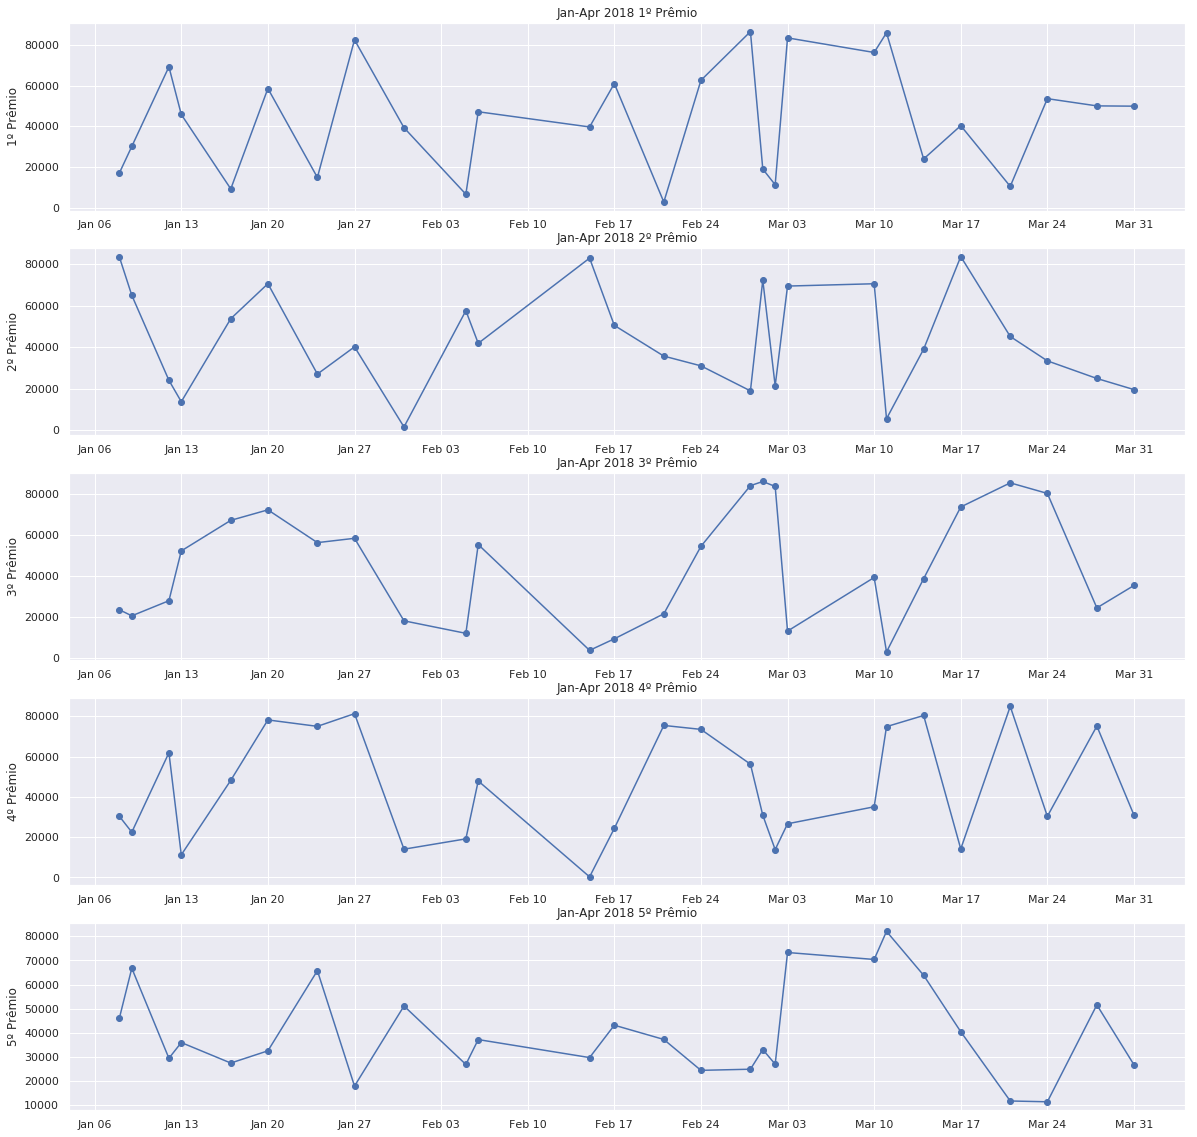

In [75]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(len(cols_plot), 1, figsize=(20, 20))

for ax, col in zip(axes, cols_plot):
    
    ax.plot(df.loc['2018-01':'2018-03', col].sort_index(), marker='o', linestyle='-')
    ax.set_ylabel(col)
    ax.set_title(f'Jan-Apr 2018 {col}')

    # Set x-axis major ticks to weekly interval, on Mondays
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[mdates.SATURDAY]))

    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Seasonality

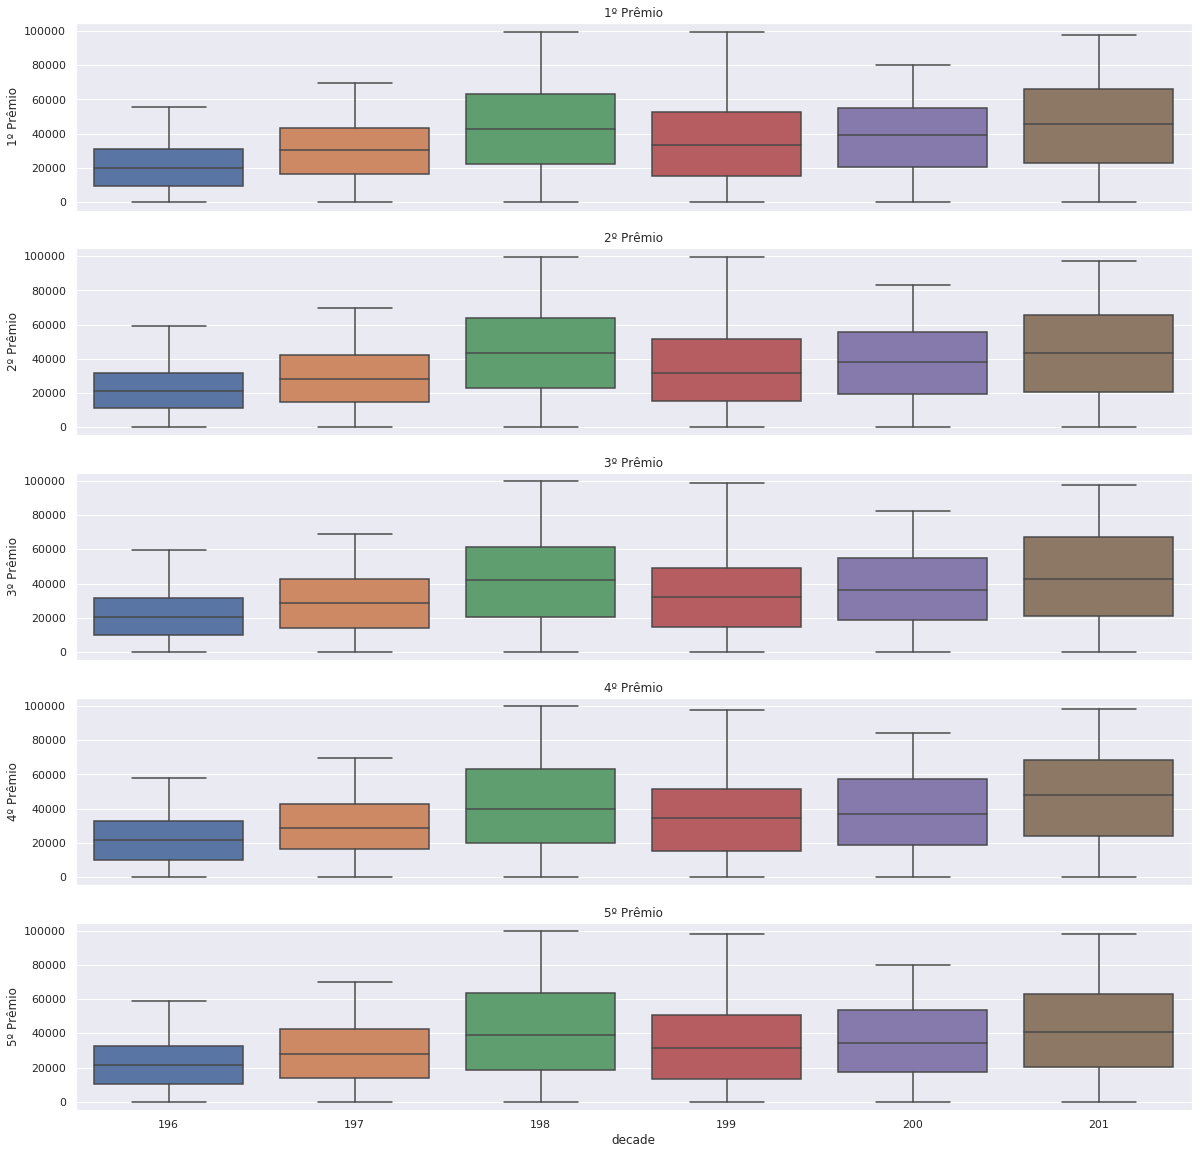

In [83]:
fig, axes = plt.subplots(len(cols_plot), 1, figsize=(20, 20), sharex=True)

for col, ax in zip(cols_plot, axes):
    
    sns.boxplot(data=df, x='decade', y=col, ax=ax)
    ax.set_ylabel(col)
    ax.set_title(col)

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

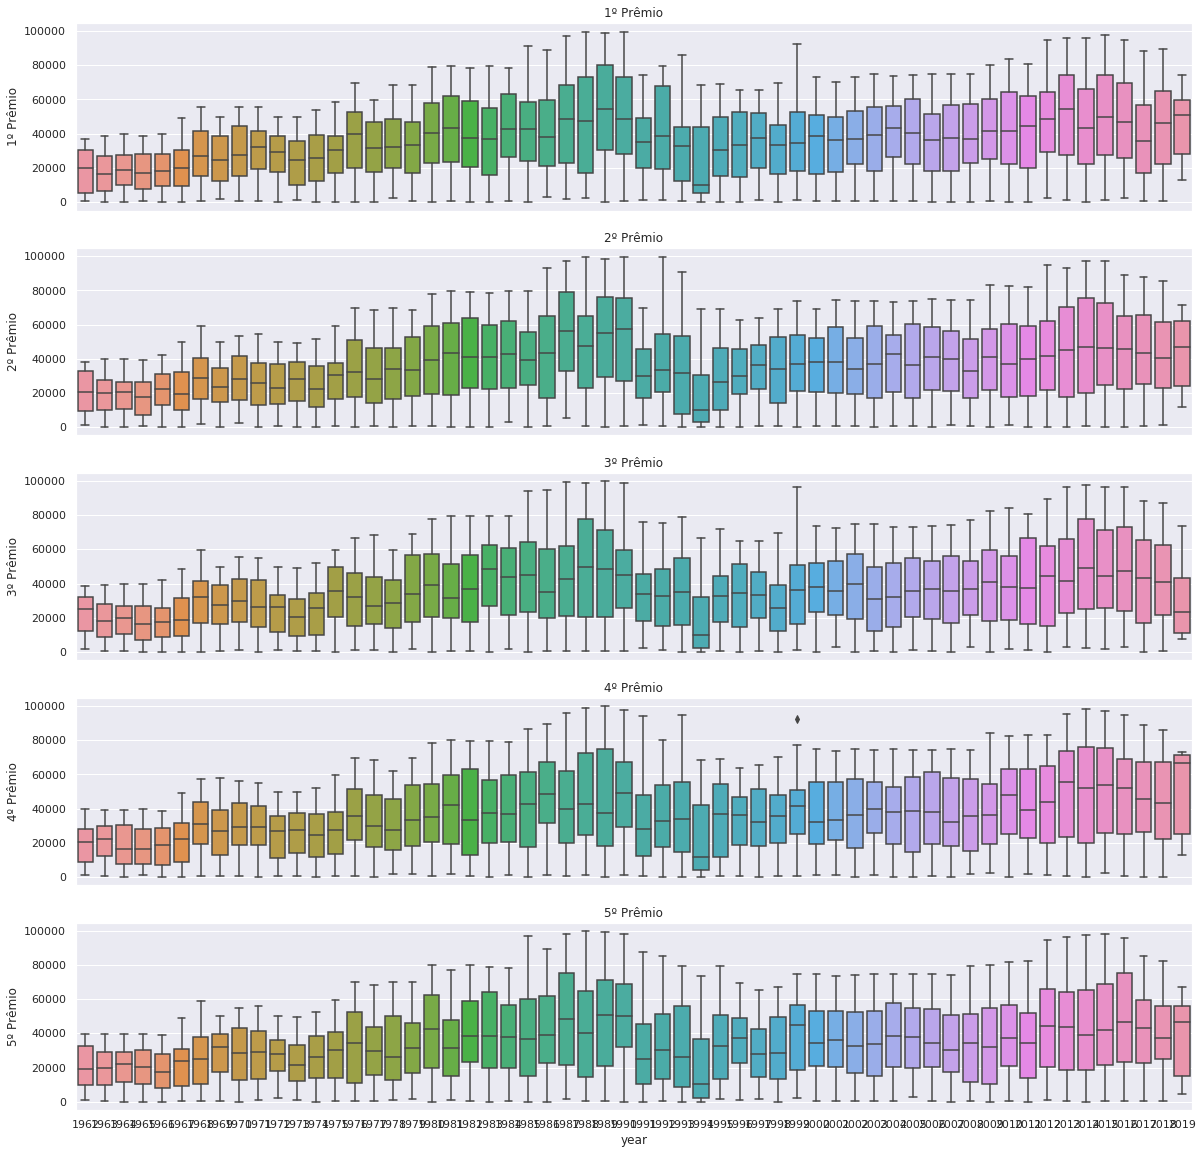

In [86]:
fig, axes = plt.subplots(len(cols_plot), 1, figsize=(20, 20), sharex=True)

for col, ax in zip(cols_plot, axes):
    
    sns.boxplot(data=df, x='year', y=col, ax=ax)
    ax.set_ylabel(col)
    ax.set_title(col)

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

# Frequencies

In [118]:
times_sample = pd.to_datetime(['2019-01-16', '2019-01-23'])

df_sample = df.loc[times_sample, ['1º Prêmio']].copy()

df_sample

,1º Prêmio
Data Sorteio,
2019-01-16,13020
2019-01-23,60016


In [119]:
df_freq = df_sample.asfreq('D')

df_freq['1º Prêmio - Forward Fill'] = df_sample.asfreq('D', method='ffill')

df_freq

,1º Prêmio,1º Prêmio - Forward Fill
Data Sorteio,,
2019-01-16,13020.0,13020
2019-01-17,NaN,13020
2019-01-18,NaN,13020
2019-01-19,NaN,13020
2019-01-20,NaN,13020
2019-01-21,NaN,13020
2019-01-22,NaN,13020
2019-01-23,60016.0,60016


# Resampling